## Movie revenue Sucess Prediction

Team 4
1. Sharvari Karnik
2. Kunal Jaiswal
3. Jayesh Patil
4. Srividya Balaji




In [ ]:
#Import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.model_selection as model_selection
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
#Reading the Data 

movie_df=pd.read_csv('/content/drive/My Drive/movie_metadata.csv')

In [ ]:
#Displaying the first 10 records

movie_df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [ ]:
#Shape of the dataset (no of rows and no of columns)

movie_df.shape

(5043, 28)

In [ ]:
#Displaying the data type of the dataset attributes 

movie_df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [ ]:
#Five point summary for the numerical columns in the dataset

movie_df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [ ]:
#Five point summary for the numerical columns in the dataset

movie_df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,1.401943e+02,1.216017e+02,1.00,50.00,110.00,195.00,8.130000e+02
duration,5028.0,1.072011e+02,2.519744e+01,7.00,93.00,103.00,118.00,5.110000e+02
director_facebook_likes,4939.0,6.865092e+02,2.813329e+03,0.00,7.00,49.00,194.50,2.300000e+04
actor_3_facebook_likes,5020.0,6.450098e+02,1.665042e+03,0.00,133.00,371.50,636.00,2.300000e+04
actor_1_facebook_likes,5036.0,6.560047e+03,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
gross,4159.0,4.846841e+07,6.845299e+07,162.00,5340987.50,25517500.00,62309437.50,7.605058e+08
num_voted_users,5043.0,8.366816e+04,1.384853e+05,5.00,8593.50,34359.00,96309.00,1.689764e+06
cast_total_facebook_likes,5043.0,9.699064e+03,1.816380e+04,0.00,1411.00,3090.00,13756.50,6.567300e+05
facenumber_in_poster,5030.0,1.371173e+00,2.013576e+00,0.00,0.00,1.00,2.00,4.300000e+01
num_user_for_reviews,5022.0,2.727708e+02,3.779829e+02,1.00,65.00,156.00,326.00,5.060000e+03


In [ ]:
#Dropping the Imdb link from the dataset

movie_df.drop('movie_imdb_link', axis=1, inplace=True)    

In [ ]:
#Removing the color section as most of the movies is colored

movie_df["color"].value_counts()

movie_df.drop('color',axis=1,inplace=True)

In [ ]:
#Checking for the columns present in the datset
movie_df.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
#Checking for the missing values in the dataset

movie_df.isna().any()

director_name                 True
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                  True
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                  True
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster          True
plot_keywords                 True
num_user_for_reviews          True
language                      True
country                       True
content_rating                True
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                   False
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [ ]:
#No of the missing values in the dataset

movie_df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:
# We can remove the null values from the dataset where the count is less . so that we don't loose much data 

movie_df.dropna(axis=0,subset=['director_name', 'num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_2_name','actor_1_facebook_likes','actor_1_name','actor_3_name','facenumber_in_poster','num_user_for_reviews','language','country','actor_2_facebook_likes','plot_keywords'],inplace=True)

In [ ]:
movie_df.shape

(4737, 26)

In [ ]:
#Replacing the content rating with Value R as it has highest frequency

movie_df["content_rating"].fillna("R", inplace = True) 

In [ ]:
#Replacing the aspect_ratio with the median of the value as the graph is right skewed 

movie_df["aspect_ratio"].fillna(movie_df["aspect_ratio"].median(),inplace=True)

In [ ]:
#We need to replace the value in budget with the median of the value

movie_df["budget"].fillna(movie_df["budget"].median(),inplace=True)

In [ ]:
# We need to replace the value in gross with the median of the value 

movie_df['gross'].fillna(movie_df['gross'].median(),inplace=True)

In [ ]:
# Recheck that all the null values are removed

movie_df.isna().sum()

director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [ ]:
#Removing the duplicate values in the datset

movie_df.drop_duplicates(inplace=True)
movie_df.shape

(4695, 26)

In [ ]:
#Count of the language values 

movie_df["language"].value_counts()

English       4405
French          69
Spanish         35
Hindi           25
Mandarin        24
German          18
Japanese        16
Russian         11
Cantonese       10
Italian         10
Portuguese       8
Korean           8
Danish           5
Persian          4
Norwegian        4
Dutch            4
Swedish          4
Hebrew           4
Arabic           3
Thai             3
Dari             2
None             2
Indonesian       2
Zulu             2
Aboriginal       2
Polish           1
Greek            1
Hungarian        1
Dzongkha         1
Kazakh           1
Icelandic        1
Aramaic          1
Vietnamese       1
Bosnian          1
Czech            1
Romanian         1
Mongolian        1
Telugu           1
Filipino         1
Maya             1
Name: language, dtype: int64

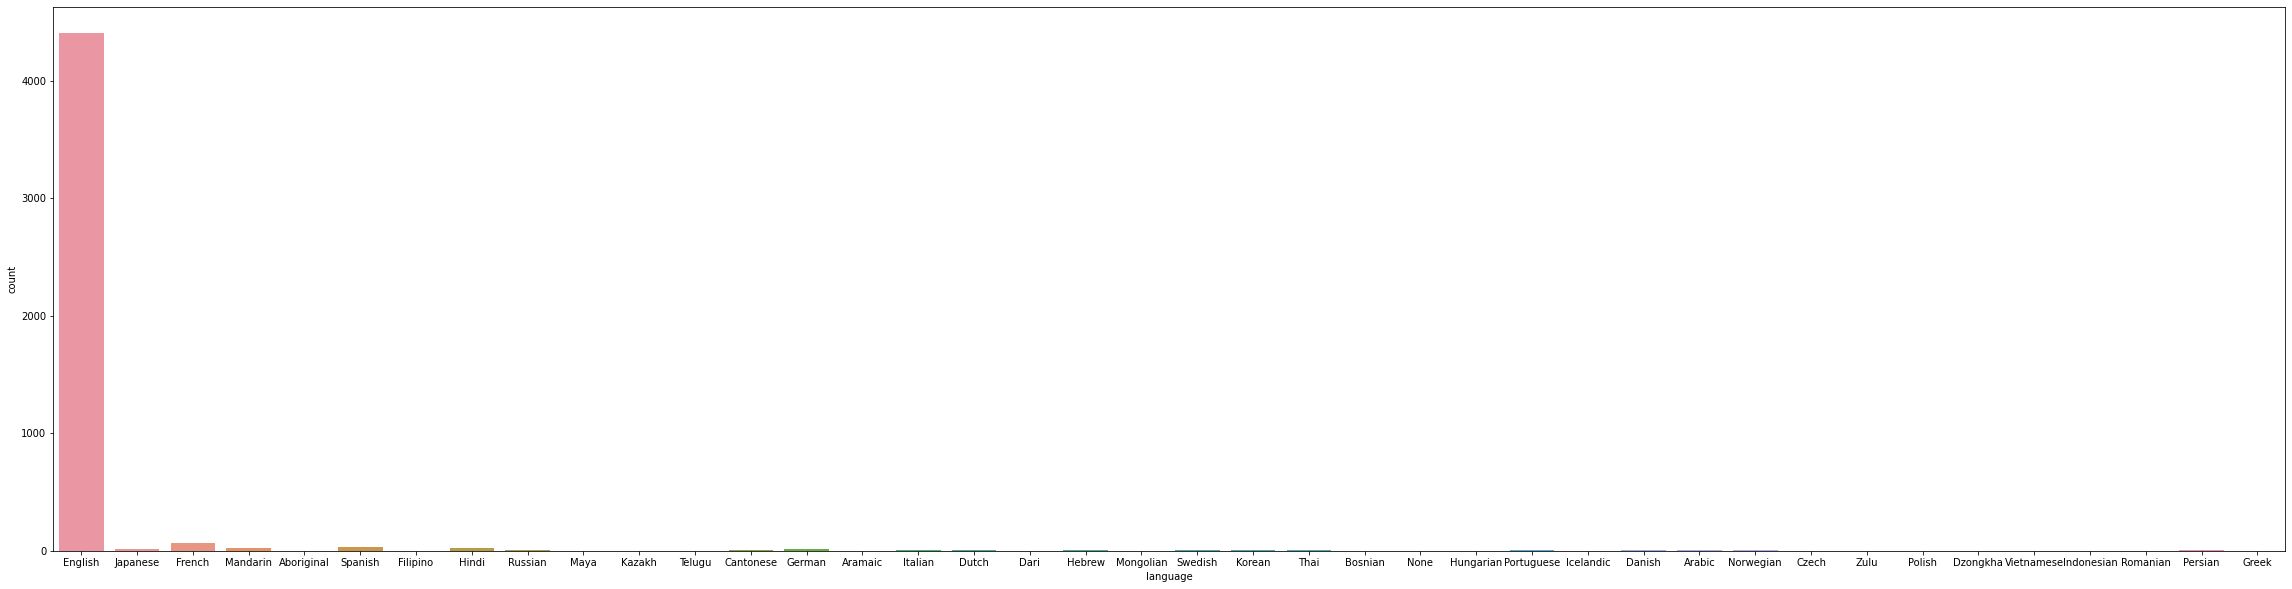

In [ ]:
# Graphical presentaion 
plt.figure(figsize=(40,10))
sns.countplot(movie_df["language"])
plt.show()

In [ ]:
#Most of the values for the languages is english we can drop the english column

movie_df.drop('language',axis=1,inplace=True)

In [ ]:
#Creating a new column to check the net profit made by the company (Gross-Budget) 

movie_df["Profit"]=movie_df['budget'].sub(movie_df['gross'], axis = 0) 

movie_df.head(5)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0


In [ ]:
#Creating a new column to check the profit percentage made by the company 

movie_df['Profit_Percentage']=(movie_df["Profit"]/movie_df["gross"])*100
movie_df

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0,-68.836532
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0,-3.039439
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0,22.454585
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0,-44.212697
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0,260.942743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5034,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,Ian Gamazon,Cavite,589,0,Quynn Ton,0.0,jihad|mindanao|philippines|security guard|squa...,35.0,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,2.35,74,-63071.0,-90.010133
5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,147,Consuelo Gómez,0.0,assassin|death|guitar|gun|mariachi,130.0,USA,R,7000.0,1992.0,20.0,6.9,1.37,0,-2033920.0,-99.657017
5037,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,1.0,written and directed by cast member,14.0,USA,Not Rated,9000.0,2011.0,205.0,6.4,2.35,413,4416.0,96.335079
5038,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,26005908.0,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,6.0,Canada,R,20000000.0,2013.0,470.0,7.7,2.35,84,-6005908.0,-23.094398


So we have added two new columns profit and profit percentage made by the movies

In [ ]:
#Value counts for the countries 

value_counts=movie_df["country"].value_counts()
print(value_counts)

USA               3568
UK                 420
France             149
Canada             107
Germany             96
Australia           53
Spain               32
India               27
China               24
Japan               21
Italy               20
Hong Kong           16
New Zealand         14
South Korea         12
Russia              11
Denmark             11
Ireland             11
Mexico              11
South Africa         8
Brazil               8
Norway               7
Netherlands          5
Sweden               5
Thailand             4
Argentina            4
Iran                 4
West Germany         3
Czech Republic       3
Israel               3
Switzerland          3
Belgium              3
Taiwan               2
Romania              2
Greece               2
Hungary              2
Iceland              2
Poland               2
Afghanistan          1
Kyrgyzstan           1
Slovakia             1
Bulgaria             1
Bahamas              1
Peru                 1
Finland    

In [ ]:
##get top 2 values of index
vals = value_counts[:2].index
print (vals)
movie_df['country'] = movie_df.country.where(movie_df.country.isin(vals), 'other')

Index(['USA', 'UK'], dtype='object')


In [ ]:
#Successfully divided the country into three catogories 
movie_df["country"].value_counts()

USA      3568
other     707
UK        420
Name: country, dtype: int64

In [ ]:
movie_df.head(10)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,-523505847.0,-68.836532
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,1238.0,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,-9404152.0,-3.039439
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,44925825.0,22.454585
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,2701.0,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,-198130642.0,-44.212697
5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,738.0,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,190641321.0,260.942743
6,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,1902.0,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,-78530303.0,-23.335284
7,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,387.0,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000,59192738.0,29.477389
8,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,1117.0,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,-208991599.0,-45.532772
9,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,973.0,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000,-51956980.0,-17.206749
10,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0.0,based on comic book|batman|sequel to a reboot|...,3018.0,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000,-80249062.0,-24.299558


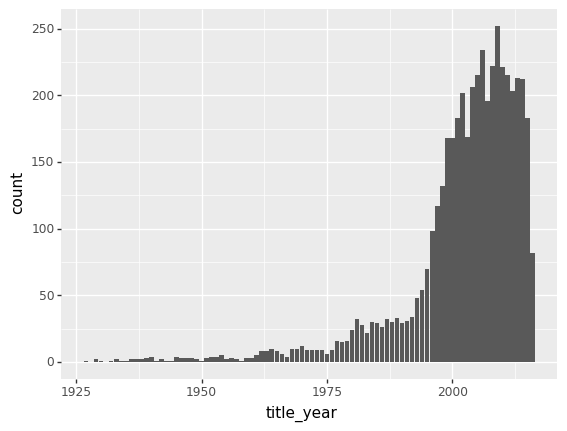

<ggplot: (8752305553777)>

In [ ]:
#Checking for the movies released year wise 

(ggplot(movie_df)         # defining what data to use
 + aes(x='title_year')    # defining what variable to use
 + geom_bar(size=20) # defining the type of plot to use
)

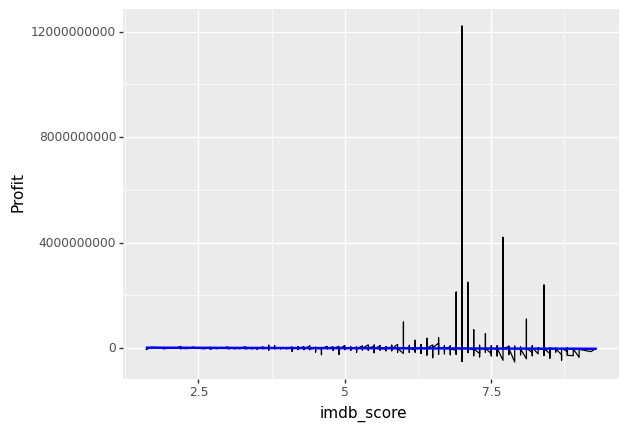

<ggplot: (8752305553756)>

In [ ]:
#Relationship between the imdb score and the profit made by the movie 

ggplot(aes(x='imdb_score', y='Profit'), data=movie_df) +\
    geom_line() +\
    stat_smooth(colour='blue', span=1)

We can see that there is strong corelation between the imdb_score and the profit . The movies with high imdb rating have made more profit

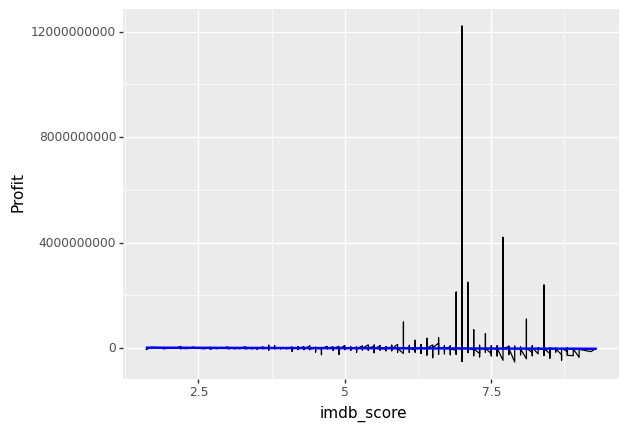

<ggplot: (8752305547233)>

In [ ]:
# Relationship between imdb score and profit percentage

ggplot(aes(x='imdb_score', y='Profit'), data=movie_df) +\
    geom_line() +\
    stat_smooth(colour='blue', span=1)

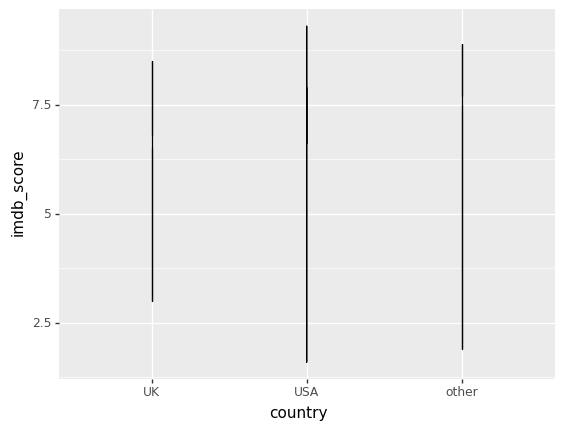

<ggplot: (8752301632239)>

In [ ]:
#Checking for the imdb rating of the movies and compared with the countries  

ggplot(aes(x='country', y='imdb_score'), data=movie_df) +\
    geom_line() +\
    stat_smooth(colour='blue', span=1)

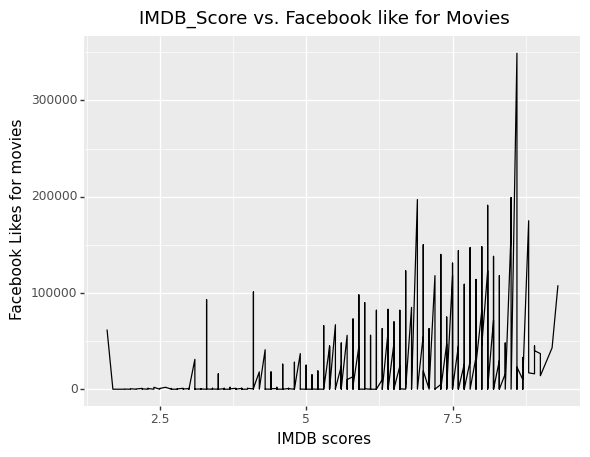

<ggplot: (-9223363284550486980)>

In [ ]:
#Finding the corelation between imdb_rating with respect to no of facebook likes 

(ggplot(movie_df)
 + aes(x='imdb_score', y='movie_facebook_likes')
 + geom_line()
 + labs(title='IMDB_Score vs. Facebook like for Movies', x='IMDB scores', y='Facebook Likes for movies')
)

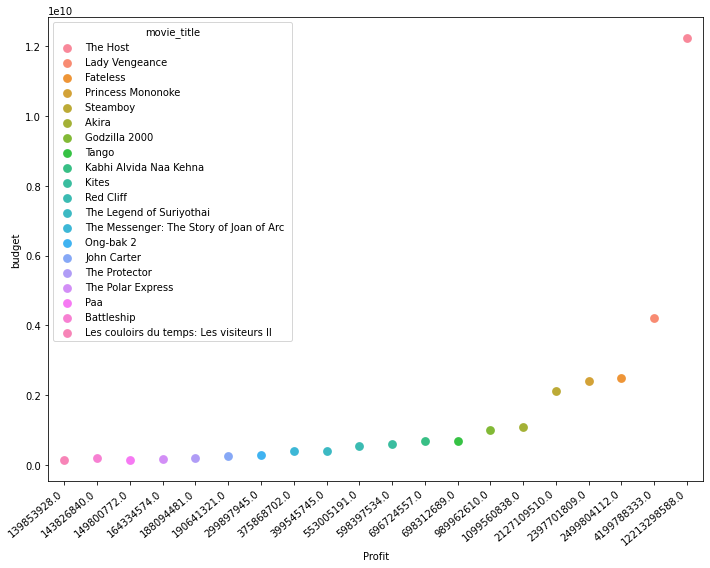

In [ ]:
#Top 20 movies based on the profit they made

plt.figure(figsize=(10,8))
movie_df= movie_df.sort_values(by ='Profit' , ascending=False)
movie_df_new=movie_df.head(20)
ax=sns.pointplot(movie_df_new['Profit'], movie_df_new['budget'], hue=movie_df_new['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

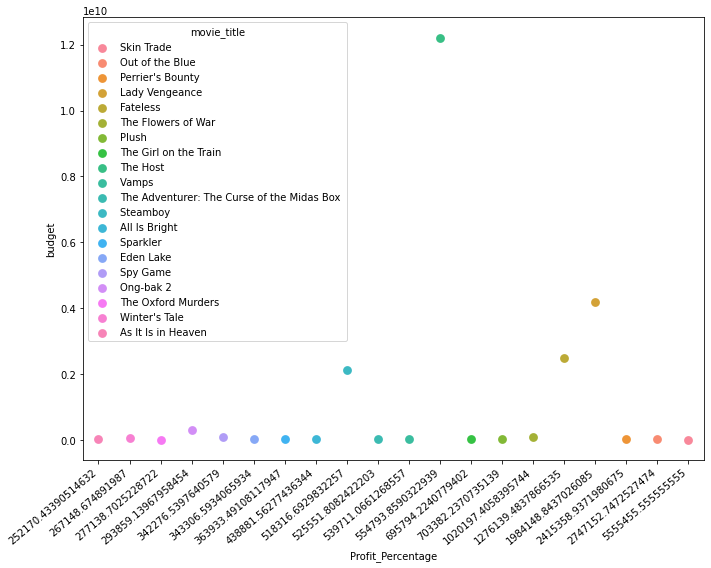

In [ ]:
# Top 20 movies based on the profit percentage
plt.figure(figsize=(10,8))
movie_df= movie_df.sort_values(by ='Profit_Percentage' , ascending=False)
movie_df_new=movie_df.head(20)
ax=sns.pointplot(movie_df_new['Profit_Percentage'], movie_df_new['budget'], hue=movie_df_new['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

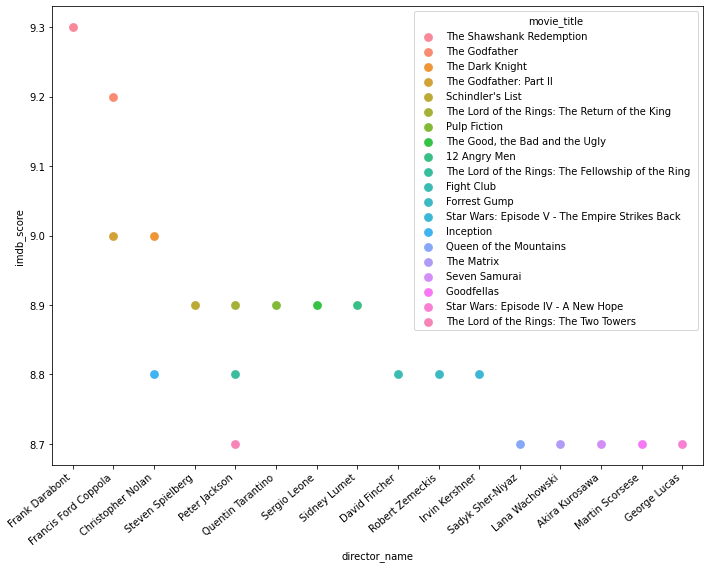

In [ ]:
#Top 20 directors based on the IMDB ratings
plt.figure(figsize=(10,8))

movie_df= movie_df.sort_values(by ='imdb_score' , ascending=False)
movie_df_new=movie_df.head(20)
ax=sns.pointplot(movie_df_new['director_name'], movie_df_new['imdb_score'], hue=movie_df_new['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

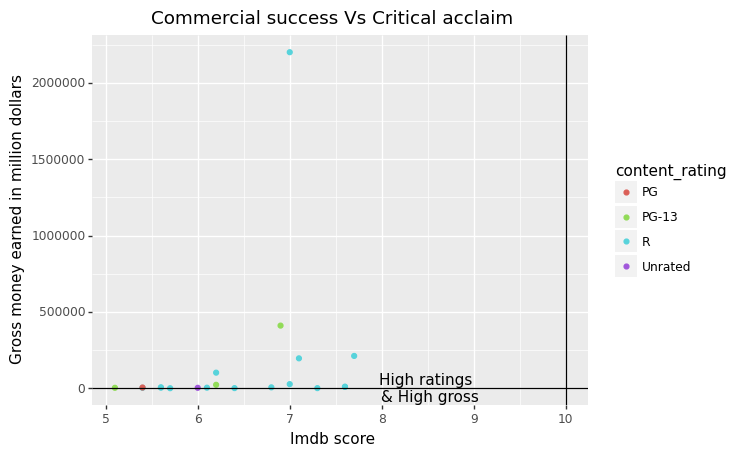

<ggplot: (-9223363284550496210)>

In [ ]:
#Commercial success vs critial acclaim
movie_df= movie_df.sort_values(by ='Profit_Percentage' , ascending=False)
movie_df_new=movie_df.head(20)
(ggplot(movie_df_new)
 + aes(x='imdb_score', y='gross',color = "content_rating")
 + geom_point()
 +  geom_hline(aes(yintercept = 600)) + 
  geom_vline(aes(xintercept = 10)) + 
  xlab("Imdb score") + 
  ylab("Gross money earned in million dollars") + 
  ggtitle("Commercial success Vs Critical acclaim") +
  annotate("text", x = 8.5, y = 700, label = "High ratings \n & High gross"))

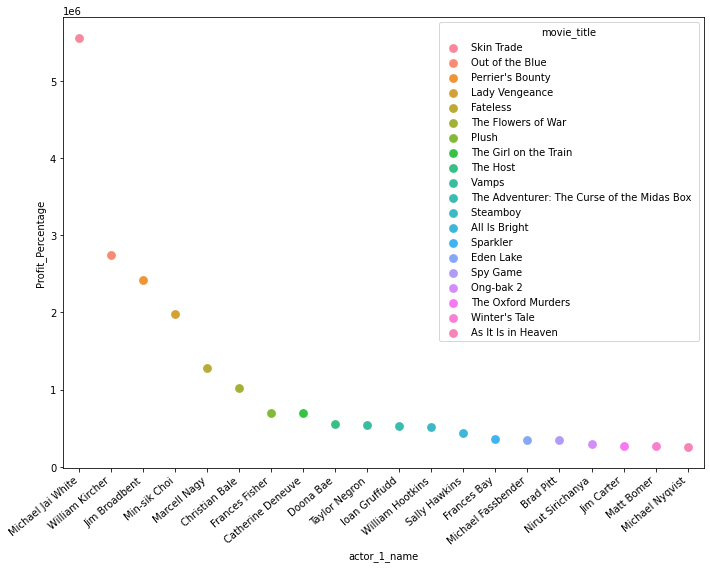

In [ ]:
#Top 20 actors of movies based on the commerical success

plt.figure(figsize=(10,8))

movie_df= movie_df.sort_values(by ='Profit_Percentage' , ascending=False)
movie_df_new=movie_df.head(20)
ax=sns.pointplot(movie_df_new['actor_1_name'], movie_df_new['Profit_Percentage'], hue=movie_df_new['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

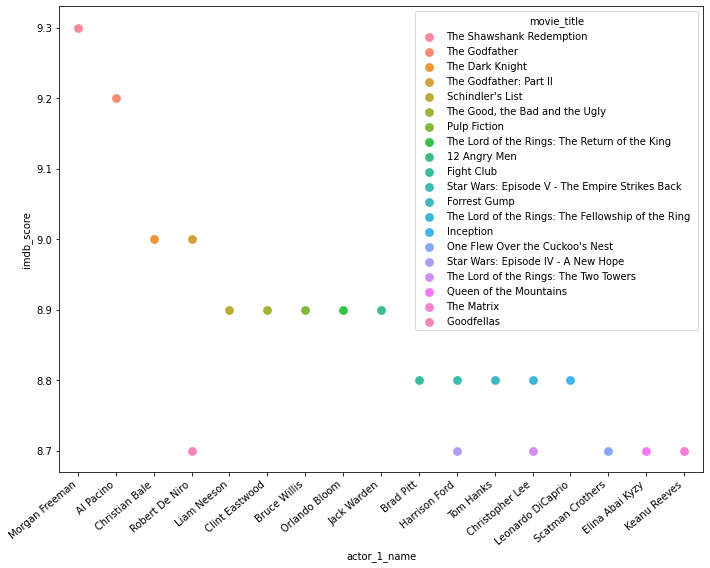

In [ ]:
#Top 20 actors of movies based on the imdb rating of the movies 

plt.figure(figsize=(10,8))

movie_df= movie_df.sort_values(by ='imdb_score' , ascending=False)
movie_df_new=movie_df.head(20)
ax=sns.pointplot(movie_df_new['actor_1_name'], movie_df_new['imdb_score'], hue=movie_df_new['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

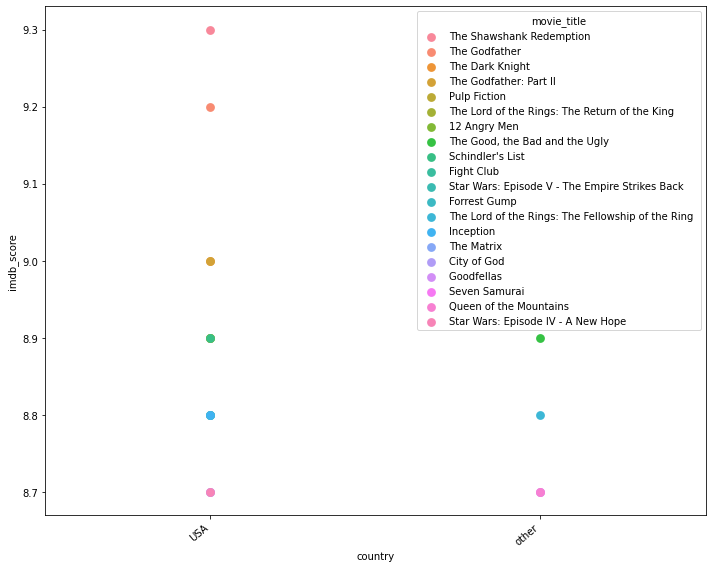

In [ ]:
# Country of Top 20 movies based on imdb rating

plt.figure(figsize=(10,8))

movie_df= movie_df.sort_values(by ='imdb_score' , ascending=False)
movie_df_new=movie_df.head(20)
ax=sns.pointplot(movie_df_new['country'], movie_df_new['imdb_score'], hue=movie_df_new['movie_title'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
# We need to categorize the imdb values in the range of 0-4,4-6,6-8 and 8-10 to mark them as the bad,average,good and excellent movies respectively

movie_df["imdb_binned_score"]=pd.cut(movie_df['imdb_score'], bins=[0,4,6,8,10], right=True, labels=False)+1

In [ ]:
#Dropping the imdb_score column as it is being replaced with the imdb_binned_score values 
movie_df.drop('imdb_score',axis=1,inplace=True)

Train-test sliptting

In [ ]:
# train-test Sliptting
X=pd.DataFrame(columns=['duration','director_facebook_likes','actor_1_facebook_likes',
                        'gross','num_voted_users','facenumber_in_poster','budget','title_year',
                        'aspect_ratio','movie_facebook_likes'],data=movie_df)
y=pd.DataFrame(columns=['imdb_binned_score'],data=movie_df)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=100)

Feature Scaling

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Logistic Regression

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
logit =LogisticRegression()
logit.fit(X_train,np.ravel(y_train,order='C'))
y_pred=logit.predict(X_test)

In [ ]:
#getting confusion metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[  0  25  21   0]
 [  0 119 259   0]
 [  2  96 818   8]
 [  1   2  23  35]]
Accuracy: 0.6898509581263307


In [ ]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, np.ravel(y_train,order='C'))
knnpred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, knnpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, knnpred))

[[  0  28  18   0]
 [  0 154 224   0]
 [  0 143 781   0]
 [  0   1  44  16]]
Accuracy: 0.6749467707594038


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, np.ravel(y_train,order='C'))
dtreepred = dtree.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, dtreepred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, dtreepred))

[[  5  26  14   1]
 [ 26 187 165   0]
 [ 21 200 681  22]
 [  2   2  28  29]]
Accuracy: 0.6401703335699077


In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, np.ravel(y_train,order='C'))
rfcpred = rfc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, rfcpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, rfcpred))

[[  1  34  11   0]
 [  1 191 186   0]
 [  2 103 817   2]
 [  0   2  29  30]]
Accuracy: 0.7374024130589071


In [ ]:
#Implemting XG-Boost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, np.ravel(y_train,order='C'))
xgbprd = xgb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, xgbprd)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, xgbprd))

[[  1  31  14   0]
 [  1 193 184   0]
 [  0 120 802   2]
 [  0   1  27  33]]
Accuracy: 0.730305180979418


In [ ]:
# implementing Gradient Boosting Model
GBoost = GradientBoostingRegressor()
y=pd.DataFrame(columns=['imdb_binned_score'],data=movie_df)
H = y_train
H = np.ravel(H,order='C')

In [ ]:
rmse_GB= []

for n_e in np.arange(1,30):
    GBoost=GradientBoostingRegressor(n_estimators =n_e, random_state=0)
    kfold = model_selection.KFold(shuffle=True, n_splits=7, random_state=0)
    mse = model_selection.cross_val_score(GBoost, X_train, H,cv=kfold, scoring='neg_mean_squared_error' )
    rmse_GB.append(np.mean(np.sqrt(np.abs(mse))))
print(rmse_GB)
print(np.argmin(rmse_GB))
GBoost=GradientBoostingRegressor(n_estimators=29)
GBoost

[0.5897804340881017, 0.5771938192939784, 0.5665465676408404, 0.5571906069812492, 0.5490298029771706, 0.5418347490663227, 0.5358019635443657, 0.5305182519720265, 0.5257155110267393, 0.5214137431296094, 0.5173521451844298, 0.5137779034241048, 0.5101649717927472, 0.5072532905778541, 0.5048884838283275, 0.5023320696386447, 0.5006881423628755, 0.49886290581850473, 0.4972681648198161, 0.49572879544811915, 0.494479719511716, 0.49327446606510456, 0.4919502851208944, 0.49075002801884077, 0.490187571551495, 0.4891002936612191, 0.4882830654057831, 0.4874868549782044, 0.4867812722013953]
28


# Implemnting AutoML h2o

In [ ]:
!pip install h2o

     |████████████████████████████████| 129.5MB 75kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.1-py2.py3-none-any.whl size=129557718 sha256=c36bf8a44d8872e0e109e808dea004240e2020712bb3c326f72a853fdd959161
  Stored in directory: /root/.cache/pip/wheels/db/42/63/d118d7218432054da842f5d10bd4f99e978bde0931164e6c7a
Successfully built h2o


In [ ]:
#Importing and setting memory size
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9sik0ncc
  JVM stdout: /tmp/tmp9sik0ncc/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp9sik0ncc/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_cipdq7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
#Creating Dataframe
movie_df
X=pd.DataFrame(columns=['duration','director_facebook_likes','actor_1_facebook_likes',
                        'gross','num_voted_users','facenumber_in_poster','budget','title_year',
                        'aspect_ratio','movie_facebook_likes'],data=movie_df)
y=pd.DataFrame(columns=['imdb_binned_score'],data=movie_df)

In [ ]:
#Getting the dataset
#movie_df["imdb_binned_score"] = movie_df["imdb_binned_score"].asfactor()
df = h2o.import_file('/content/drive/My Drive/movie_metadata.csv')
df.head(3)

Parse progress: |█████████████████████████████████████████████████████████| 100%


color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,7.60506e+08,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054,English,USA,PG-13,2.37e+08,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,3.09404e+08,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238,English,USA,PG-13,3e+08,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,2.00074e+08,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994,English,UK,PG-13,2.45e+08,2015,393,6.8,2.35,85000


In [ ]:
df = h2o.import_file('/content/drive/My Drive/movie_metadata.csv')
df.head(3)

Parse progress: |█████████████████████████████████████████████████████████| 100%


color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,7.60506e+08,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054,English,USA,PG-13,2.37e+08,2009,936,7.9,1.78,33000
Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,3.09404e+08,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238,English,USA,PG-13,3e+08,2007,5000,7.1,2.35,0
Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,2.00074e+08,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994,English,UK,PG-13,2.45e+08,2015,393,6.8,2.35,85000


In [ ]:
x=['duration','director_facebook_likes','actor_1_facebook_likes',
                       'gross','num_voted_users','facenumber_in_poster','budget','title_year',
                        'aspect_ratio','movie_facebook_likes']
y="imdb_score"

In [ ]:
#train-test splitting and running the models
aml = H2OAutoML(max_models = 30, max_runtime_secs=300, seed = 1)
aml.train(x = x, y = y, training_frame = df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [ ]:
#Leaderboard
lb = aml.leaderboard
lb.head(5)
 # Entire leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20200420_195554,0.62697,0.791815,0.62697,0.565847,0.125387
StackedEnsemble_BestOfFamily_AutoML_20200420_195554,0.630664,0.794144,0.630664,0.567612,0.125707
XGBoost_grid__1_AutoML_20200420_195554_model_6,0.647535,0.804695,0.647535,0.577187,0.127099
GBM_2_AutoML_20200420_195554,0.650478,0.806522,0.650478,0.579558,0.127413
GBM_1_AutoML_20200420_195554,0.651571,0.8072,0.651571,0.580499,0.12738


### Visualization of model implemented  with there cross validation score

DT: 0.661551 (0.001059)


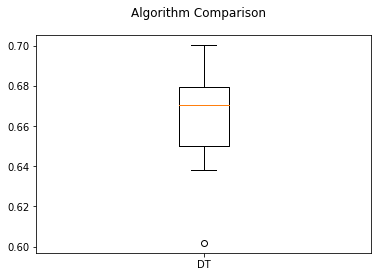

Logistic: 0.668722 (0.000611)


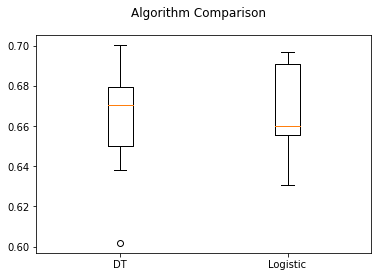

RFC: 0.544082 (0.000792)


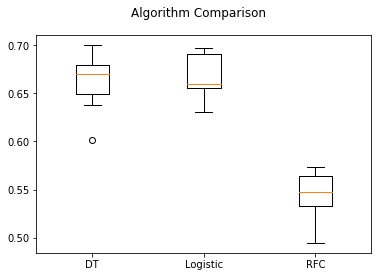

KNN: 0.678094 (0.000805)


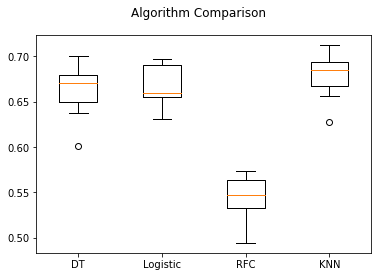

XGBoost: 0.548184 (0.000780)


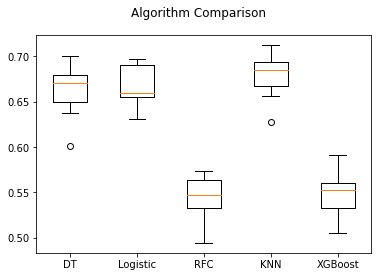

GBoost: 0.488298 (0.000457)


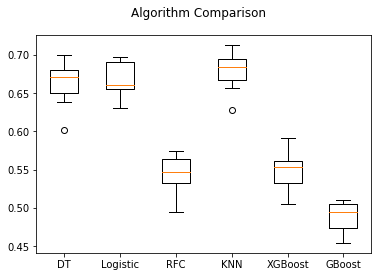

In [ ]:


models=[]
models.append(('DT',dtree))

models.append(('Logistic',logit))

models.append(('RFC',rfc))

models.append(('KNN', knn))

models.append(('XGBoost',xgb))

models.append(('GBoost', GBoost))

import sklearn.model_selection as model_selection
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(shuffle=True, n_splits=7, random_state=0)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error' ) # fit, train, predict
    results.append(np.sqrt(np.abs(cv_results)))    # negative mean squared error 
    names.append(name)
    print('%s: %f (%f)'% (name, np.mean(np.sqrt(np.abs(cv_results))), np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
    
    # boxplot algorithm comparision
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

### Conclusion
We have sucessfully implemented the various algorithms and h20 auto ml to get the best results and shown the graphical representation of algorithm comparision.



#### Accuracy Score
![alt text](https://drive.google.com/uc?id=1hBJFcYlrMXKDafiOc760ZiG0AtNujp4k)